# 1.  Import Libraries

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 
from sklearn.preprocessing import OneHotEncoder

project_dir = '/sasinside/userdata/gegrab/resources/hmeq'

# 2.   Read Data

In [17]:
df = pd.read_csv('Data_orig/AutoLoan.csv')
#df = df.dropna() # Or some way to treat missing values 

auto= df.drop('BAD', axis=1)

 
 
class_inputs   = ['REASON', 'JOB']
target         = ["BAD"]
numeric_inputs = ['LOAN', 'LOANDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ','CLNO', 'DEBTINC']
class_inputs   = ['REASON', 'JOB']

impute_values = df[numeric_inputs].mean()
pickle.dump(impute_values, open('/sasinside/userdata/gegrab/resources/hmeq/autoloan_pytorch_impute.pickle','wb'))
   
    
df           =df.fillna(impute_values)

 
df.REASON.replace(np.nan,'CarImp',regex = True, inplace=True)
df.JOB.replace(np.nan,'Other',regex = True, inplace=True)

sample =auto.head()

 
sample.to_csv('Data_orig/autoloan2_pytorch_test2.csv', index=False)
 
print(sample)
 

   Loan_ID  LOAN  LOANDUE     VALUE  REASON     JOB   YOJ  DEROG  DELINQ  \
0   772418  1100  25860.0   39025.0  CarImp   Other  10.5    0.0     0.0   
1   477724  1300  70053.0   68400.0  CarImp   Other   7.0    0.0     2.0   
2   150746  1500  13500.0   16700.0  CarImp   Other   4.0    0.0     0.0   
3   108584  1500      NaN       NaN     NaN     NaN   NaN    NaN     NaN   
4   321534  1700  97800.0  112000.0  CarImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN  


# 3.  Class Distribution

<AxesSubplot:xlabel='BAD', ylabel='count'>

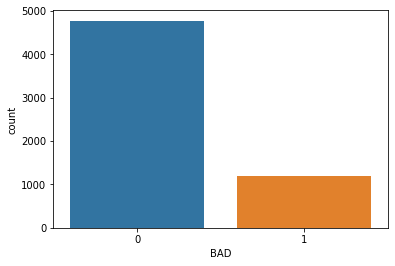

In [18]:
sns.countplot(x = 'BAD', data=df)
 

# 5.  Create Input and Output Data

In [19]:

y = df.iloc[:,1]
X = df.iloc[:,2:] 

 

 
print(y.head())
print(X.head())

 

0    1
1    1
2    1
3    1
4    0
Name: BAD, dtype: int64
   LOAN     LOANDUE          VALUE  REASON     JOB        YOJ    DEROG  \
0  1100  25860.0000   39025.000000  CarImp   Other  10.500000  0.00000   
1  1300  70053.0000   68400.000000  CarImp   Other   7.000000  0.00000   
2  1500  13500.0000   16700.000000  CarImp   Other   4.000000  0.00000   
3  1500  73760.8172  101776.048741  CarImp   Other   8.922268  0.25457   
4  1700  97800.0000  112000.000000  CarImp  Office   3.000000  0.00000   

     DELINQ       CLAGE      NINQ       CLNO    DEBTINC  
0  0.000000   94.366667  1.000000   9.000000  33.779915  
1  2.000000  121.833333  0.000000  14.000000  33.779915  
2  0.000000  149.466667  1.000000  10.000000  33.779915  
3  0.449442  179.766275  1.186055  21.296096  33.779915  
4  0.000000   93.333333  0.000000  14.000000  33.779915  


# 6.  Train Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

count = y_test.value_counts()
print(count)


0    1549
1     418
Name: BAD, dtype: int64


In [21]:
ohe = OneHotEncoder(sparse = False, handle_unknown="ignore")
enc =  ohe.fit_transform(X_train[class_inputs])

X_train[ohe.get_feature_names(class_inputs)] = pd.DataFrame(enc, index=X_train.index)
X_train.drop(class_inputs,1,inplace=True)
#print(X_train.head())

enc2 =  ohe.fit_transform(X_test[class_inputs])
X_test[ohe.get_feature_names(class_inputs)] = pd.DataFrame(enc2, index=X_test.index)
X_test.drop(class_inputs,1,inplace=True)
#print(X_test.head())
 
pickle.dump(ohe, open(project_dir+"/autoloan_pytorch_encoder.pickle", 'wb'))

/sasinside/miniconda3/envs/pytorch2021/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/tmp/ipykernel_25225/4114303409.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train.drop(class_inputs,1,inplace=True)
/sasinside/miniconda3/envs/pytorch2021/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/tmp/ipykernel_25225/4114303409.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-

In [22]:
#print(X_test.head())
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#scaler = MinMaxScaler()
# fit scaler on the training dataset
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
pickle.dump(scaler, open('/sasinside/userdata/gegrab/resources/hmeq/autoloan_pytorch_scaler.pickle', 'wb'))

 
  

# 8.  Model Parameters

In [23]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

# 9.  Define Custom Dataloaders

In [24]:
## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

#test_tensor = torch.Tensor(test.values)
train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train.values))
                       #torch.Float(y_train))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))
 

In [25]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=1)
 

# 10.  Define Neural Net Architecture

In [26]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 18.      
        self.layer_1 = nn.Linear(18, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
         
       
        return x
    
net = binaryClassification()

In [27]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
###################### OUTPUT ######################
cuda:0

cpu


In [28]:
model2 = binaryClassification()
model2.to(device)
print(model2)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model2.parameters(), lr=LEARNING_RATE)

binaryClassification(
  (layer_1): Linear(in_features=18, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


# 11. Train the model

In [30]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [31]:
model2.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model2(X_batch)
      
        gene = torch.sigmoid(y_pred) 
        #gene = y_pred
        px = pd.DataFrame(gene).astype("float")
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.57487 | Acc: 73.889
Epoch 002: | Loss: 0.45625 | Acc: 82.651
Epoch 003: | Loss: 0.37601 | Acc: 86.111
Epoch 004: | Loss: 0.32615 | Acc: 87.413
Epoch 005: | Loss: 0.30044 | Acc: 88.206
Epoch 006: | Loss: 0.28114 | Acc: 89.079
Epoch 007: | Loss: 0.26410 | Acc: 89.619
Epoch 008: | Loss: 0.25018 | Acc: 90.159
Epoch 009: | Loss: 0.23599 | Acc: 90.825
Epoch 010: | Loss: 0.22060 | Acc: 91.571
Epoch 011: | Loss: 0.20948 | Acc: 92.270
Epoch 012: | Loss: 0.19517 | Acc: 92.952
Epoch 013: | Loss: 0.18319 | Acc: 93.206
Epoch 014: | Loss: 0.17230 | Acc: 93.968
Epoch 015: | Loss: 0.16184 | Acc: 94.571
Epoch 016: | Loss: 0.15295 | Acc: 94.619
Epoch 017: | Loss: 0.14158 | Acc: 95.286
Epoch 018: | Loss: 0.13561 | Acc: 95.270
Epoch 019: | Loss: 0.12783 | Acc: 95.794
Epoch 020: | Loss: 0.12679 | Acc: 95.349
Epoch 021: | Loss: 0.11415 | Acc: 96.190
Epoch 022: | Loss: 0.11048 | Acc: 96.000
Epoch 023: | Loss: 0.10598 | Acc: 96.222
Epoch 024: | Loss: 0.09771 | Acc: 96.556
Epoch 025: | Los

# 12.  Test the model

In [32]:
y_pred_list = []
gene_list =[]
y_test_pred_list= [] 
input_list = []

model2.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model2(X_batch)
        input = X_batch
        gene = model2(X_batch)   
        y_test_pred = torch.sigmoid(y_test_pred)
        gene = torch.sigmoid(gene) 
        y_pred_tag = torch.round(y_test_pred)
        
        y_pred_list.append(y_pred_tag.cpu().numpy())
        gene_list.append(gene.cpu().numpy())
        y_test_pred_list.append(y_test_pred.cpu().numpy())
        input_list.append(input.cpu().numpy())

 

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]


gene_list = [a.squeeze().tolist() for a in gene_list]
                          
input_list =[a.squeeze().tolist() for a in input_list]                  
    


#print(input_list[0])
#print(gene[:10])
 
print(y_test_pred_list[:5])
 
 
 

[array([[0.6770942]], dtype=float32), array([[0.00026256]], dtype=float32), array([[1.]], dtype=float32), array([[7.4993826e-05]], dtype=float32), array([[0.00051749]], dtype=float32)]


# 13.  Confusion Matrix

In [33]:
confusion_matrix(y_test, y_pred_list)

array([[1519,   30],
       [ 174,  244]])

# 14.  Classification Report

In [34]:
print(classification_report(y_test, y_pred_list))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1549
           1       0.89      0.58      0.71       418

    accuracy                           0.90      1967
   macro avg       0.89      0.78      0.82      1967
weighted avg       0.90      0.90      0.89      1967



# 15.  Save and Load the Model

In [35]:
project_dir = '/sasinside/userdata/gegrab/resources/hmeq'
torch.save(model2.state_dict(), project_dir +'/'+ 'AutoLoan_PyTorch_Classifier.pt')
model3 = binaryClassification()
model3.load_state_dict(torch.load(project_dir + '/' + 'AutoLoan_PyTorch_Classifier.pt'))
model3.eval()

scaler2 = pickle.load(open(project_dir + '/' + 'autoloan_pytorch_scaler.pickle', 'rb'))

#inputMatrix = scaler2.transform(X_test)
#already scaled!!!
inputMatrix = X_test

X_test_var = Variable(torch.FloatTensor(inputMatrix), requires_grad=True) 


with torch.no_grad():
    predict_proba =model3(X_test_var)
    predict_proba = torch.sigmoid(predict_proba)   
    predict_proba = pd.DataFrame(predict_proba).astype("float")
    
    
print(predict_proba[:5])

          0
0  0.677094
1  0.000263
2  1.000000
3  0.000075
4  0.000517


In [36]:
#pt vs pickle??

project_dir = '/sasinside/userdata/gegrab/resources/hmeq'
torch.save(model2.state_dict(), project_dir +'/'+ 'AutoLoan_PyTorch_Classifier.pt')
model3 = binaryClassification()
model3.load_state_dict(torch.load(project_dir + '/' + 'AutoLoan_PyTorch_Classifier.pt'))
model3.eval()

#original method
torch.save(model2, project_dir +'/'+ 'AutoLoan_PyTorch_Classifier_orig.pt')
model4=torch.load(project_dir +'/' + 'AutoLoan_PyTorch_Classifier_orig.pt')

scaler2 = pickle.load(open(project_dir + '/' + 'autoloan_pytorch_scaler.pickle', 'rb'))


modelx =  binaryClassification()
modelx.load_state_dict(torch.load("/sasinside/userdata/gegrab/resources/hmeq/AutoLoan_PyTorch_Classifier.pt"))
modelx.eval()
    

#inputMatrix = scaler2.transform(X_test)
#already scaled!!!
inputMatrix = X_test

X_test_var = Variable(torch.FloatTensor(inputMatrix), requires_grad=True) 


with torch.no_grad():
    predict_proba =model3(X_test_var)
    predict_proba = torch.sigmoid(predict_proba)   
    predict_proba = pd.DataFrame(predict_proba).astype("float")
    
    
print(predict_proba[:5])

with torch.no_grad():
    predict_proba =model4(X_test_var)
    predict_proba = torch.sigmoid(predict_proba)   
    predict_proba = pd.DataFrame(predict_proba).astype("float")
    
    
print(predict_proba[:5])
 
 

          0
0  0.677094
1  0.000263
2  1.000000
3  0.000075
4  0.000517
          0
0  0.677094
1  0.000263
2  1.000000
3  0.000075
4  0.000517


In [37]:
input_params = ''
for col in auto.columns:
    input_params += col
    if col != auto.columns[-1]:
        input_params += ', '

input_cols = ''
for col in auto.columns:
    input_cols += "\"" + col + "\""
    if col != auto.columns[-1]:
        input_cols += ', '


print(input_cols)
print("")
print(input_params)


"Loan_ID", "LOAN", "LOANDUE", "VALUE", "REASON", "JOB", "YOJ", "DEROG", "DELINQ", "CLAGE", "NINQ", "CLNO", "DEBTINC"

Loan_ID, LOAN, LOANDUE, VALUE, REASON, JOB, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC


In [39]:
# Export the model


import onnxruntime as rt
import onnx
torch.onnx.export(model2,               # model being run
                  X_test_var[0:2],                         # model input (or a tuple for multiple inputs)
                  "/sasinside/userdata/gegrab/resources/hmeq/AutoLoan_PyTorch_ONNX.onnx",   # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=10,          # the ONNX version to export the model to            
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'] # the model's output names
                 )


 

In [43]:
def execute(Loan_ID, LOAN, LOANDUE, VALUE, REASON, JOB, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC ):
    "Output: P_BAD"
        
    #global pred_onnx
    
    import onnxruntime as rt
    import pickle
    import numpy as np
    import pandas as pd
    
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import Dataset, DataLoader
    from torch.autograd import Variable
     
    
    inputArray = pd.DataFrame([[Loan_ID, LOAN, LOANDUE, VALUE, REASON, JOB, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC]],
                              columns = ["Loan_ID","LOAN", "LOANDUE", "VALUE", "REASON", "JOB", "YOJ", "DEROG", "DELINQ", "CLAGE", 
                                         "NINQ", "CLNO", "DEBTINC"]
                               )
    
    dummy=inputArray
     
    inputArray = pd.concat([inputArray,dummy], sort=False)
    
      
    def preprocessing(df, ohe_loc = None):

        categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
    
        with open(ohe_loc, "rb") as ohe_file:
            ohe = pickle.load(ohe_file) 
        
        enc = ohe.transform(df[categorical_cols])
    
        df[ohe.get_feature_names(categorical_cols).tolist()] = pd.DataFrame(enc, index=df.index)

        df.drop(categorical_cols,1,inplace=True)

        df.dropna(inplace=True)
    
        return df

    
    inputArray.fillna(pickle.load(open('/sasinside/userdata/gegrab/resources/hmeq/autoloan_pytorch_impute.pickle', 'rb')), inplace=True)
    inputArray.REASON.replace(np.nan,'CarImp',regex = True, inplace=True)
    inputArray.JOB.replace(np.nan,'Other',regex = True, inplace=True)

    inputArray.drop(['Loan_ID'], axis=1, inplace=True)
    
    
    inputArray = preprocessing(inputArray, "/sasinside/userdata/gegrab/resources/hmeq/autoloan_pytorch_encoder.pickle")
    
     
    
    scaler2 = pickle.load(open("/sasinside/userdata/gegrab/resources/hmeq/autoloan_pytorch_scaler.pickle", 'rb'))
    
    inputMatrix = scaler2.transform(inputArray)
    
     
    
    #X_test_var = Variable(torch.FloatTensor(inputMatrix), requires_grad=True) 
    X_test_var = torch.FloatTensor(inputMatrix)
     


    ort_session = rt.InferenceSession("/sasinside/userdata/gegrab/resources/hmeq/AutoLoan_PyTorch_ONNX.onnx")

    def to_numpy(tensor):
        return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

    ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(X_test_var)} 
    ort_outs = torch.FloatTensor(ort_session.run(None, ort_inputs))
     
     
    predict_proba = torch.sigmoid(ort_outs)   
    #predict_proba = predict_proba.numpy()
    

    P_BAD = float(predict_proba[0][0])
     
     
    return (P_BAD)

 

In [44]:
 
import pandas as pd
testdf= pd.read_csv('Data_orig/autoloan2_pytorch_test2.csv')  
 
for i in range(5):
    print(execute(**testdf.iloc[i]))
 

0.9999558925628662
0.9984656572341919
0.9999994039535522
0.7779723405838013
9.979824244510382e-05


/sasinside/miniconda3/envs/pytorch2021/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/tmp/ipykernel_25225/1900645834.py:39: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(categorical_cols,1,inplace=True)
/tmp/ipykernel_25225/1900645834.py:74: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272204863/work/torch/csrc/utils/tensor_new.cpp:201.)
  ort_outs = torch.FloatTensor(ort_session.run(None, ort_inputs))
/sasinside/miniconda3/envs/pytorch2021/lib/python3.9/site-packages/

In [45]:
score_code = """
def execute(Loan_ID, LOAN, LOANDUE, VALUE, REASON, JOB, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC ):
    "Output: P_BAD"
        
    #global pred_onnx
    
    import onnxruntime as rt
    import pickle
    import numpy as np
    import pandas as pd
    
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import Dataset, DataLoader
    from torch.autograd import Variable
     
    
    inputArray = pd.DataFrame([[Loan_ID, LOAN, LOANDUE, VALUE, REASON, JOB, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC]],
                              columns = ["Loan_ID","LOAN", "LOANDUE", "VALUE", "REASON", "JOB", "YOJ", "DEROG", "DELINQ", "CLAGE", 
                                         "NINQ", "CLNO", "DEBTINC"]
                               )
    
    dummy=inputArray
     
    inputArray = pd.concat([inputArray,dummy], sort=False)
    
      
    def preprocessing(df, ohe_loc = None):

        categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
    
        with open(ohe_loc, "rb") as ohe_file:
            ohe = pickle.load(ohe_file) 
        
        enc = ohe.transform(df[categorical_cols])
    
        df[ohe.get_feature_names(categorical_cols).tolist()] = pd.DataFrame(enc, index=df.index)

        df.drop(categorical_cols,1,inplace=True)

        df.dropna(inplace=True)
    
        return df

    
    inputArray.fillna(pickle.load(open('/sasinside/userdata/gegrab/resources/hmeq/autoloan_pytorch_impute.pickle', 'rb')), inplace=True)
    inputArray.REASON.replace(np.nan,'CarImp',regex = True, inplace=True)
    inputArray.JOB.replace(np.nan,'Other',regex = True, inplace=True)

    inputArray.drop(['Loan_ID'], axis=1, inplace=True)
    
    
    inputArray = preprocessing(inputArray, "/sasinside/userdata/gegrab/resources/hmeq/autoloan_pytorch_encoder.pickle")
    
     
    
    scaler2 = pickle.load(open("/sasinside/userdata/gegrab/resources/hmeq/autoloan_pytorch_scaler.pickle", 'rb'))
    
    inputMatrix = scaler2.transform(inputArray)
    
     
    
    #X_test_var = Variable(torch.FloatTensor(inputMatrix), requires_grad=True) 
    X_test_var = torch.FloatTensor(inputMatrix)
     


    ort_session = rt.InferenceSession("/sasinside/userdata/gegrab/resources/hmeq/AutoLoan_PyTorch_ONNX.onnx")

    def to_numpy(tensor):
        return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

    ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(X_test_var)} 
    ort_outs = torch.FloatTensor(ort_session.run(None, ort_inputs))
     
     
    predict_proba = torch.sigmoid(ort_outs)   
    #predict_proba = predict_proba.numpy()
    

    P_BAD = float(predict_proba[0][0])
     
     
    return (P_BAD)"""
 
f = open('Data_orig/AutoLoan_Pytorch_ONNX.py',"w+")
f.write(score_code)
f.close()


